In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import numpy as np

In [4]:
selected = ['suburb', 'date', 'type','region_name', 'distance','price',"year_built"]

melb_house1 = pd.read_csv("h:\\Downloads\\melb_house.csv", sep=",", usecols=selected)
melb_house1

,suburb,type,price,date,distance,year_built,region_name
0,Abbotsford,h,NaN,2016-09-03,2.5,NaN,Northern Metropolitan
1,Abbotsford,h,1480000.0,2016-12-03,2.5,NaN,Northern Metropolitan
2,Abbotsford,h,1035000.0,2016-02-04,2.5,1900.0,Northern Metropolitan
3,Abbotsford,u,NaN,2016-02-04,2.5,NaN,Northern Metropolitan
4,Abbotsford,h,1465000.0,2017-03-04,2.5,1900.0,Northern Metropolitan
...,...,...,...,...,...,...,...
34852,Yarraville,h,1480000.0,2018-02-24,6.3,NaN,Western Metropolitan
34853,Yarraville,h,888000.0,2018-02-24,6.3,2018.0,Western Metropolitan
34854,Yarraville,t,705000.0,2018-02-24,6.3,2000.0,Western Metropolitan
34855,Yarraville,h,1140000.0,2018-02-24,6.3,NaN,Western Metropolitan


In [5]:
x=melb_house1.groupby(["suburb","date"])["price"].mean().reset_index()
x.columns = ["Suburb","Date","Price"]
x[x["Suburb"].isin(["Abbotsford","Yarraville"])]

,Suburb,Date,Price
0,Abbotsford,2016-02-04,1.035000e+06
1,Abbotsford,2016-04-16,NaN
2,Abbotsford,2016-04-23,7.000000e+05
3,Abbotsford,2016-05-07,1.408500e+06
4,Abbotsford,2016-05-14,4.410000e+05
...,...,...,...
11086,Yarraville,2018-02-10,1.110000e+06
11087,Yarraville,2018-02-17,9.756000e+05
11088,Yarraville,2018-02-24,1.055667e+06
11089,Yarraville,2018-03-03,1.641667e+06


Text(0.5, 1.0, 'Swarm Plot of Price by Suburb and Region')

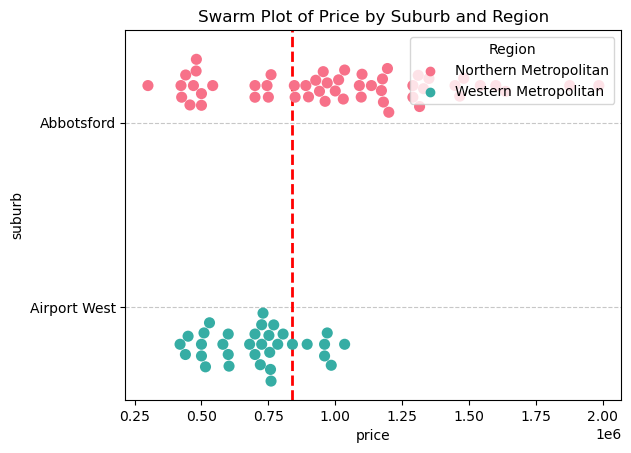

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
y=melb_house1.head(100)

sns.swarmplot(x="price",y="suburb",data=y,hue="region_name",dodge=True, size=8, palette="husl")
plt.legend(title="Region", loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
median_price = y["price"].median()
plt.axvline(x=median_price, color='red', linestyle='--', linewidth=2, label='Median Price')
plt.title("Swarm Plot of Price by Suburb and Region")


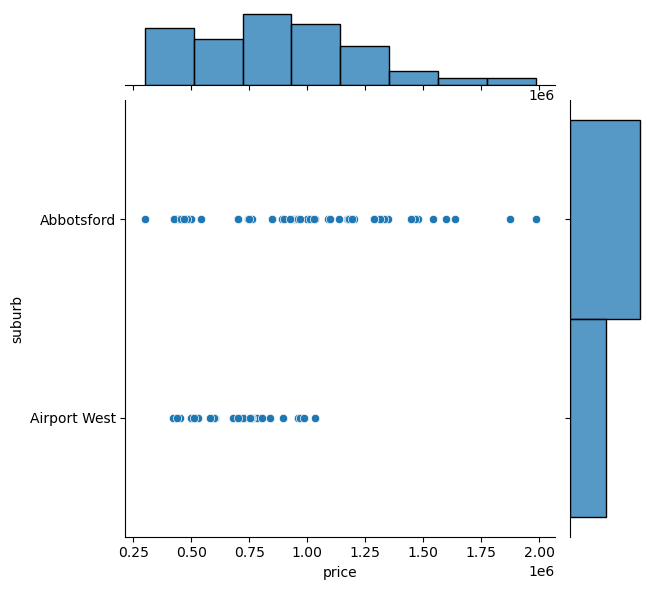

In [7]:
sns.jointplot(x="price",y="suburb",data=y)


<Axes: >

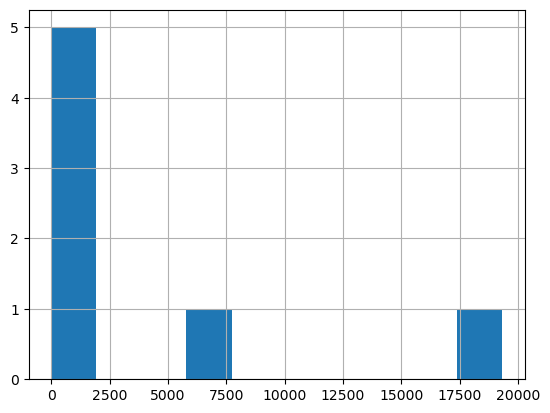

In [11]:
melb_house1.isna().sum().hist()

In [12]:
melb_house1["distance2"]=melb_house1["distance"]*20000
melb_house1["distance2"]


0         50000.0
1         50000.0
2         50000.0
3         50000.0
4         50000.0
           ...   
34852    126000.0
34853    126000.0
34854    126000.0
34855    126000.0
34856    126000.0
Name: distance2, Length: 34857, dtype: float64

In [13]:
melb_house1

,suburb,type,price,date,distance,year_built,region_name,distance2
0,Abbotsford,h,NaN,2016-09-03,2.5,NaN,Northern Metropolitan,50000.0
1,Abbotsford,h,1480000.0,2016-12-03,2.5,NaN,Northern Metropolitan,50000.0
2,Abbotsford,h,1035000.0,2016-02-04,2.5,1900.0,Northern Metropolitan,50000.0
3,Abbotsford,u,NaN,2016-02-04,2.5,NaN,Northern Metropolitan,50000.0
4,Abbotsford,h,1465000.0,2017-03-04,2.5,1900.0,Northern Metropolitan,50000.0
...,...,...,...,...,...,...,...,...
34852,Yarraville,h,1480000.0,2018-02-24,6.3,NaN,Western Metropolitan,126000.0
34853,Yarraville,h,888000.0,2018-02-24,6.3,2018.0,Western Metropolitan,126000.0
34854,Yarraville,t,705000.0,2018-02-24,6.3,2000.0,Western Metropolitan,126000.0
34855,Yarraville,h,1140000.0,2018-02-24,6.3,NaN,Western Metropolitan,126000.0


In [13]:
melb_house1.pivot_table(values="price",index=["suburb","region_name"],fill_value=0,aggfunc=[np.mean,np.median])

,,mean,median
,,price,price
suburb,region_name,,
Abbotsford,Northern Metropolitan,1.033549e+06,1021250
Aberfeldie,Western Metropolitan,1.307193e+06,1300000
Airport West,Western Metropolitan,7.513642e+05,752000
Albanvale,Western Metropolitan,5.360556e+05,540000
Albert Park,Southern Metropolitan,1.927651e+06,1810000
...,...,...,...
Yallambie,Northern Metropolitan,8.208611e+05,780250
Yarra Glen,Northern Victoria,6.200000e+05,620000


In [14]:
melb_house1["price"].value_counts(sort=True)

price
1100000.0    235
600000.0     235
650000.0     219
800000.0     217
1300000.0    210
            ... 
1452000.0      1
2555000.0      1
949500.0       1
426500.0       1
1605500.0      1
Name: count, Length: 2871, dtype: int64

In [15]:
melb_house1[melb_house1['region_name'].str.contains('Northern Metropolitan', case=False, na=False)]

,suburb,type,price,date,distance,year_built,region_name,distance2
0,Abbotsford,h,NaN,2016-09-03,2.5,NaN,Northern Metropolitan,50000.0
1,Abbotsford,h,1480000.0,2016-12-03,2.5,NaN,Northern Metropolitan,50000.0
2,Abbotsford,h,1035000.0,2016-02-04,2.5,1900.0,Northern Metropolitan,50000.0
3,Abbotsford,u,NaN,2016-02-04,2.5,NaN,Northern Metropolitan,50000.0
4,Abbotsford,h,1465000.0,2017-03-04,2.5,1900.0,Northern Metropolitan,50000.0
...,...,...,...,...,...,...,...,...
34846,Wollert,h,630000.0,2018-02-24,25.5,NaN,Northern Metropolitan,510000.0
34847,Wollert,h,500000.0,2018-02-24,25.5,2016.0,Northern Metropolitan,510000.0
34848,Wollert,h,621000.0,2018-02-24,25.5,NaN,Northern Metropolitan,510000.0
34849,Wollert,h,570000.0,2018-02-24,25.5,2012.0,Northern Metropolitan,510000.0


In [16]:
x=melb_house1[(melb_house1["distance"]>3)&(melb_house1["distance"]<6)]
x

,suburb,type,price,date,distance,year_built,region_name,distance2
133,Albert Park,h,1275000.0,2016-09-03,3.3,1900.0,Southern Metropolitan,66000.0
134,Albert Park,h,1455000.0,2016-09-03,3.3,NaN,Southern Metropolitan,66000.0
135,Albert Park,h,2850000.0,2017-03-04,3.3,1890.0,Southern Metropolitan,66000.0
136,Albert Park,h,1850000.0,2017-03-04,3.3,1890.0,Southern Metropolitan,66000.0
137,Albert Park,h,NaN,2017-03-04,3.3,1900.0,Southern Metropolitan,66000.0
...,...,...,...,...,...,...,...,...
34799,Travancore,h,NaN,2018-02-24,4.3,NaN,Western Metropolitan,86000.0
34829,West Melbourne,u,NaN,2018-02-24,3.1,NaN,Northern Metropolitan,62000.0
34830,West Melbourne,t,1150000.0,2018-02-24,3.1,NaN,Northern Metropolitan,62000.0
34844,Windsor,u,440000.0,2018-02-24,4.6,NaN,Southern Metropolitan,92000.0


In [17]:
melb_house1.sort_values(["distance2","price"],ascending=[True,False])

,suburb,type,price,date,distance,year_built,region_name,distance2
25204,Melbourne,u,6500000.0,2017-10-21,0.0,NaN,Northern Metropolitan,0.0
27145,Melbourne,u,2250000.0,2017-11-11,0.0,NaN,Northern Metropolitan,0.0
29682,Melbourne,u,1825000.0,2018-01-06,0.0,NaN,Northern Metropolitan,0.0
21347,Melbourne,u,1710000.0,2017-09-16,0.0,NaN,Northern Metropolitan,0.0
28863,Melbourne,u,1660000.0,2017-11-25,0.0,NaN,Northern Metropolitan,0.0
...,...,...,...,...,...,...,...,...
20139,New Gisborne,h,690000.0,2017-09-03,48.1,2002.0,Northern Victoria,962000.0
29755,New Gisborne,h,625000.0,2018-01-06,48.1,NaN,Northern Victoria,962000.0
22634,New Gisborne,h,565000.0,2017-09-23,48.1,NaN,Northern Victoria,962000.0
22633,New Gisborne,h,NaN,2017-09-23,48.1,2009.0,Northern Victoria,962000.0


In [18]:
melb_house1= melb_house1.assign(Product=lambda x: (x['price'] * x['distance2'] * x['distance']))
melb_house1


,suburb,type,price,date,distance,year_built,region_name,distance2,Product
0,Abbotsford,h,NaN,2016-09-03,2.5,NaN,Northern Metropolitan,50000.0,NaN
1,Abbotsford,h,1480000.0,2016-12-03,2.5,NaN,Northern Metropolitan,50000.0,1.850000e+11
2,Abbotsford,h,1035000.0,2016-02-04,2.5,1900.0,Northern Metropolitan,50000.0,1.293750e+11
3,Abbotsford,u,NaN,2016-02-04,2.5,NaN,Northern Metropolitan,50000.0,NaN
4,Abbotsford,h,1465000.0,2017-03-04,2.5,1900.0,Northern Metropolitan,50000.0,1.831250e+11
...,...,...,...,...,...,...,...,...,...
34852,Yarraville,h,1480000.0,2018-02-24,6.3,NaN,Western Metropolitan,126000.0,1.174824e+12
34853,Yarraville,h,888000.0,2018-02-24,6.3,2018.0,Western Metropolitan,126000.0,7.048944e+11
34854,Yarraville,t,705000.0,2018-02-24,6.3,2000.0,Western Metropolitan,126000.0,5.596290e+11
34855,Yarraville,h,1140000.0,2018-02-24,6.3,NaN,Western Metropolitan,126000.0,9.049320e+11


In [19]:
column_names={
    'year_built':"year"
}
melb_house1.rename(columns=column_names)

,suburb,type,price,date,distance,year,region_name,distance2,Product
0,Abbotsford,h,NaN,2016-09-03,2.5,NaN,Northern Metropolitan,50000.0,NaN
1,Abbotsford,h,1480000.0,2016-12-03,2.5,NaN,Northern Metropolitan,50000.0,1.850000e+11
2,Abbotsford,h,1035000.0,2016-02-04,2.5,1900.0,Northern Metropolitan,50000.0,1.293750e+11
3,Abbotsford,u,NaN,2016-02-04,2.5,NaN,Northern Metropolitan,50000.0,NaN
4,Abbotsford,h,1465000.0,2017-03-04,2.5,1900.0,Northern Metropolitan,50000.0,1.831250e+11
...,...,...,...,...,...,...,...,...,...
34852,Yarraville,h,1480000.0,2018-02-24,6.3,NaN,Western Metropolitan,126000.0,1.174824e+12
34853,Yarraville,h,888000.0,2018-02-24,6.3,2018.0,Western Metropolitan,126000.0,7.048944e+11
34854,Yarraville,t,705000.0,2018-02-24,6.3,2000.0,Western Metropolitan,126000.0,5.596290e+11
34855,Yarraville,h,1140000.0,2018-02-24,6.3,NaN,Western Metropolitan,126000.0,9.049320e+11


In [28]:
melted_df = pd.melt(melb_house1, id_vars=['suburb', 'type', 'price', 'date', 'distance', 'year_built', 'region_name', 'distance2'], 
                              value_vars=['Product'])
melted_df

,suburb,type,price,date,distance,year_built,region_name,distance2,variable,value
0,Abbotsford,h,NaN,2016-09-03,2.5,NaN,Northern Metropolitan,50000.0,Product,NaN
1,Abbotsford,h,1480000.0,2016-12-03,2.5,NaN,Northern Metropolitan,50000.0,Product,1.850000e+11
2,Abbotsford,h,1035000.0,2016-02-04,2.5,1900.0,Northern Metropolitan,50000.0,Product,1.293750e+11
3,Abbotsford,u,NaN,2016-02-04,2.5,NaN,Northern Metropolitan,50000.0,Product,NaN
4,Abbotsford,h,1465000.0,2017-03-04,2.5,1900.0,Northern Metropolitan,50000.0,Product,1.831250e+11
...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,h,1480000.0,2018-02-24,6.3,NaN,Western Metropolitan,126000.0,Product,1.174824e+12
34853,Yarraville,h,888000.0,2018-02-24,6.3,2018.0,Western Metropolitan,126000.0,Product,7.048944e+11
34854,Yarraville,t,705000.0,2018-02-24,6.3,2000.0,Western Metropolitan,126000.0,Product,5.596290e+11
34855,Yarraville,h,1140000.0,2018-02-24,6.3,NaN,Western Metropolitan,126000.0,Product,9.049320e+11
